<a href="https://colab.research.google.com/github/Vamshi-dhar/Pyspark/blob/master/Pyspayk_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Apache Spark 2.2.1 Pyspark in Colab**

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 2.2.1 with hadoop 2.7, Java 8 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, Follow the steps to install the dependencies:

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz
!tar xf spark-2.2.1-bin-hadoop2.7.tgz
!pip install -q findspark

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.2.1-bin-hadoop2.7"

Run a local spark session to test your installation:

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import pandas as pd
a = [1,2,4,5,6,7,8]
b = [12,1,1,2,14,15,10]
df = spark.createDataFrame(pd.DataFrame({'A': a, 'B':b}))
df.show(5)

+---+---+
|  A|  B|
+---+---+
|  1| 12|
|  2|  1|
|  4|  1|
|  5|  2|
|  6| 14|
+---+---+
only showing top 5 rows



(array([3., 4.]), array([ 1,  8, 15]), <a list of 2 Patch objects>)

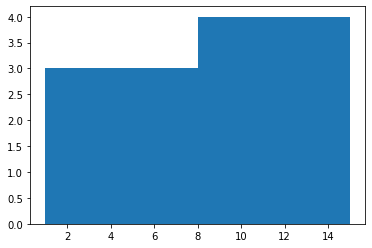

In [ ]:
import matplotlib.pyplot as plt
# Show histogram of the 'C1' column
bins, counts = df.select('B').rdd.flatMap(lambda x: x).histogram(2)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)